In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns

In [2]:
# Load the dataset and using salary as a nickname for the dataframe
salary = pd.read_csv("Salary_Survey.csv")

In [3]:
# Understading the dataset number of rows (observations) and columns (variables) 
salary.shape

(28178, 23)

In [4]:
# Undesrtading the data, view of the first 10 rows to get an idea of what the data looks like
salary.head(10)

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",...,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,"62,000",NaN,USD,NaN,NaN,...,8 - 10 years,2 - 4 years,Master's degree,Man,NaN,NaN,NaN,NaN,NaN,NaN
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,NaN,"33,000",2000.0,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT","50,000",NaN,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Man,NaN,NaN,NaN,NaN,NaN,NaN
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,"112,000",10000.0,USD,NaN,NaN,...,21 - 30 years,21 - 30 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,"45,000",0.0,USD,NaN,I work for a Charter School,...,21 - 30 years,21 - 30 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking the data type
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28178 entries, 0 to 28177
Data columns (total 23 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                --------------  -----  
 0   Timestamp                                                                                                                                                                                                                             28085 non-null  object 
 1   How old are you?                                                                                             

In [6]:
# Now lets rename the columns for a better visualizaton
#I'm only using inplace=True after make sure renaming is correct and avoid overriding the original dataframe as I did in the CA version 1.
# Once Im sure I can go back in the code and add inplace=True and run code again.
salary.rename(columns={
    "How old are you?": "Age", 
    "What industry do you work in?": "Field", 
    "If your job title needs additional context, please clarify here:": "Context",
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": "Salary Year",
    "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.": "Benefits Compensations",
    "Please indicate the currency": "Currency",
    "If \"Other,\" please indicate the currency here:": "Other",
    "What country do you work in?": "Contry of Work",
    "If your income needs additional context, please provide it here:": "Income Context",
    "What city do you work in?": "City of Work",                       
    "How many years of professional work experience do you have overall?": "Years Exp Overal",
    "How many years of professional work experience do you have in your field?": "Years Exp Fiel",
    "What is your highest level of education completed?": "Education",              
    "What is your gender?": "Gender"}, inplace=True)

In [7]:
# Checking missing valuesfrom each column:
# There are two types of missing values in every dataset:
# 1. Visible errors: blank cells, special symbols like NA (Not Available), NaN (Not a Number), etc.
# 2. Obscure errors: non-corrupt but invalid values. For example, a negative salary or a number for a name.
salary.isnull().sum()                     

Timestamp                                               93
Age                                                     93
Field                                                  167
Job title                                               94
Context                                              20911
Salary Year                                             93
Benefits Compensations                                7398
Currency                                                93
If "Other," please indicate the currency here:       27971
Income Context                                       25134
Contry of Work                                          93
If you're in the U.S., what state do you work in?     5119
City of Work                                           175
Years Exp Overal                                        93
Years Exp Fiel                                          93
Education                                              315
Gender                                                 2

In [8]:
# Having issue to renane the columns ->If "Other," please indicate the currency here:<- as per the double " " were single quotes shold resolve.
print(salary.columns)

Index(['Timestamp', 'Age', 'Field', 'Job title', 'Context', 'Salary Year',
       'Benefits Compensations', 'Currency',
       'If "Other," please indicate the currency here: ', 'Income Context',
       'Contry of Work', 'If you're in the U.S., what state do you work in?',
       'City of Work', 'Years Exp Overal', 'Years Exp Fiel', 'Education',
       'Gender', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


In [9]:
# Droping single columns to see if the code worked. 
salary = salary.drop(['If "Other," please indicate the currency here: '], axis=1)
# Noticed theres a space after the : returning not found. Just noticed looking at the printed columns

In [10]:
# The apostrophe (you're) is also preventing renaming and droping. In this case double "" should work
salary = salary.drop(["If you're in the U.S., what state do you work in?"], axis=1)

In [11]:
# Checking again column manes
print(salary.columns)

Index(['Timestamp', 'Age', 'Field', 'Job title', 'Context', 'Salary Year',
       'Benefits Compensations', 'Currency', 'Income Context',
       'Contry of Work', 'City of Work', 'Years Exp Overal', 'Years Exp Fiel',
       'Education', 'Gender', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


In [12]:
# Backup to prevent dataloss again. To retrieve salary = salary_backup.copy()
salary_backup = salary.copy()

In [13]:
# Dropping ALL OTHER irrelevant columns
salary = salary.drop([ 
                        'Timestamp', 
                        'Context', 
                        'Income Context', 
                        'Unnamed: 17',
                        'Unnamed: 18',
                        'Unnamed: 19', 
                        'Unnamed: 20',
                        'Unnamed: 21',
                        'Unnamed: 22',
                    	'Unnamed: 22'], axis=1)

In [14]:
# Checking duplicate where True is the rows duplicated and False for unique rows.
salary.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
28173     True
28174     True
28175     True
28176     True
28177     True
Length: 28178, dtype: bool

In [15]:
#Checking again if code worked
salary.head(10)

,Age,Field,Job title,Salary Year,Benefits Compensations,Currency,Contry of Work,City of Work,Years Exp Overal,Years Exp Fiel,Education,Gender
0,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,United States,Boston,5-7 years,5-7 years,Master's degree,Woman
1,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,United Kingdom,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",NaN,USD,US,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman
3,25-34,Nonprofits,Program Manager,"62,000",3000.0,USD,USA,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
4,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",7000.0,USD,US,Greenville,8 - 10 years,5-7 years,College degree,Woman
5,25-34,Education (Higher Education),Scholarly Publishing Librarian,"62,000",NaN,USD,USA,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man
6,25-34,Publishing,Publishing Assistant,"33,000",2000.0,USD,USA,Columbia,2 - 4 years,2 - 4 years,College degree,Woman
7,25-34,Education (Primary/Secondary),Librarian,"50,000",NaN,USD,United States,Yuma,5-7 years,5-7 years,Master's degree,Man
8,45-54,Computing or Tech,Systems Analyst,"112,000",10000.0,USD,US,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman
9,35-44,"Accounting, Banking & Finance",Senior Accountant,"45,000",0.0,USD,United States,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman


In [16]:
# display the lat rows (observations) 
salary.tail(10)

,Age,Field,Job title,Salary Year,Benefits Compensations,Currency,Contry of Work,City of Work,Years Exp Overal,Years Exp Fiel,Education,Gender
28168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
salary_backup = salary.copy()

In [18]:
salary.count()

Age                       28085
Field                     28011
Job title                 28084
Salary Year               28085
Benefits Compensations    20780
Currency                  28085
Contry of Work            28085
City of Work              28003
Years Exp Overal          28085
Years Exp Fiel            28085
Education                 27863
Gender                    27914
dtype: int64

In [19]:
# Drop row that has all NaN values
salary = salary.dropna(how='all')

In [20]:
salary.tail(10)

,Age,Field,Job title,Salary Year,Benefits Compensations,Currency,Contry of Work,City of Work,Years Exp Overal,Years Exp Fiel,Education,Gender
28075,18-24,Engineering or Manufacturing,Operations Project Lead,41600,NaN,USD,United States,Milledgeville,5-7 years,1 year or less,Some college,Man
28076,18-24,Computing or Tech,Student,1000,100.0,USD,US,Atlanta,1 year or less,1 year or less,Some college,Man
28077,25-34,Social Work,Counsellor,40000,0.0,Other,Singapore,Singapore,8 - 10 years,8 - 10 years,Master's degree,Woman
28078,18-24,"Leisure, Sport & Tourism",dockhand,33280,10500.0,USD,United States,Greensboro,1 year or less,1 year or less,Some college,Man
28079,35-44,Health care,Pharmacy Buyer,53060,0.0,USD,United States of America,Springfield,21 - 30 years,11 - 20 years,Some college,Woman
28080,45-54,"Accounting, Banking & Finance",Product Manager Lead,117000,8000.0,USD,USA,Remote,11 - 20 years,11 - 20 years,College degree,Woman
28081,45-54,Education (Primary/Secondary),Curriculum Writer,70000,0.0,USD,United States,Bennettsville,21 - 30 years,21 - 30 years,Master's degree,Woman
28082,55-64,Government and Public Administration,Clerical Officer,28600,NaN,EUR,Ireland,Dublin,21 - 30 years,1 year or less,"Professional degree (MD, JD, etc.)",Man
28083,18-24,Computing or Tech,Software Engineering Co-Op,56160,0.0,USD,United States,Jhonston,1 year or less,1 year or less,College degree,Man
28084,65 or over,Social networks,Content creator,2000000,NaN,USD,Taiwan,Milwaukee,41 years or more,2 - 4 years,PhD,Non-binary


In [21]:
# Since we droped rows with NaN values, next step is to convert the NaN values from specic column, in this case Benefit Comp.
salary['Benefits Compensations'] = salary['Benefits Compensations'].fillna(0.0)

In [22]:
salary['Benefits Compensations']

0           0.0
1        4000.0
2           0.0
3        3000.0
4        7000.0
          ...  
28080    8000.0
28081       0.0
28082       0.0
28083       0.0
28084       0.0
Name: Benefits Compensations, Length: 28085, dtype: float64

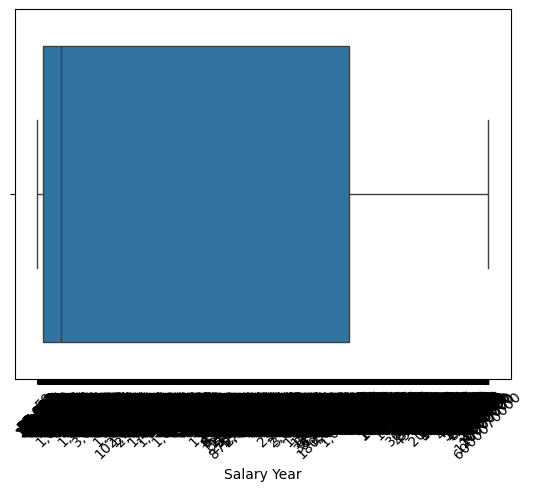

In [23]:
# Since noticed that not all companies pays benefity, focus now is on Salary Year. 
# Checking outliers
# Importing libraries to boxplot.
import matplotlib.pyplot as plt
sns.boxplot(data=salary, x="Salary Year")
plt.xticks(rotation=45)
plt.show()

In [24]:
# I forgot that in this dataset we do have multiple cureencyes, and the above chart is in fact mixing up GBP, EURO and USD.
# I had in mind to use MAX and MIN values from the Salary columns to understand if outliers was typo perhaps, but wont work as per diferent currencies.

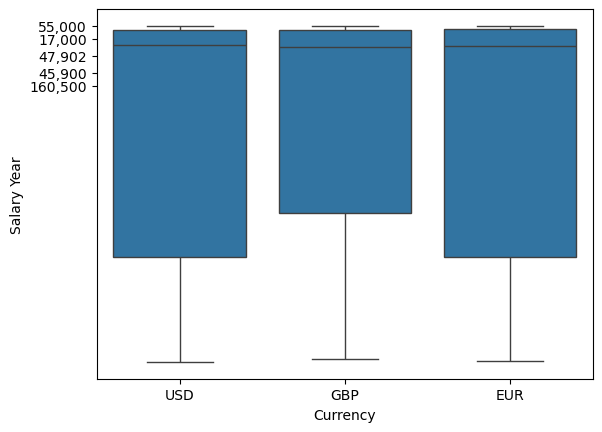

In [25]:
# Solution is to use feature selection like .loc as seen in classs example to filter salary year based on currency coluns.

# First lets filter row that currecy column is GBP, EURO and USD. using .isin we check if the vlues is in the currency we provided a list and will be displayed in the new variable named salary_currency. 
salary_currency= salary.loc[salary['Currency'].isin(['GBP', 'EUR', 'USD'])]

# Create a chart with Salary Year on the axis y and Currency in the axis x. 
sns.boxplot(data=salary_currency, x='Currency', y='Salary Year')

# In this case we set the y axis to a linear scale to control how it is spaced defining the values I want to show. 
plt.yticks(ticks=[0, 150, 350, 550, 700])

# Print the chart
plt.show()


In [26]:
salary_backup = salary.copy()

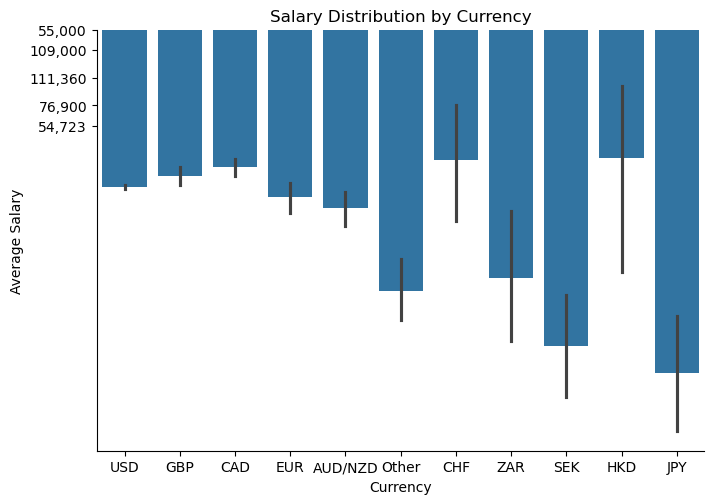

In [27]:
# Create a categorical plot (catplot) with bars
sns.catplot(
            x='Currency',        
            y='Salary Year',    
            data=salary,       
            kind='bar',          
            height=5,           
            aspect=1.5            
            )

# Arranging labels
plt.title('Salary Distribution by Currency')
plt.xlabel('Currency')
plt.ylabel('Average Salary')
plt.yticks(ticks=[0, 150, 350, 550, 700])

# Show the chart
plt.show()

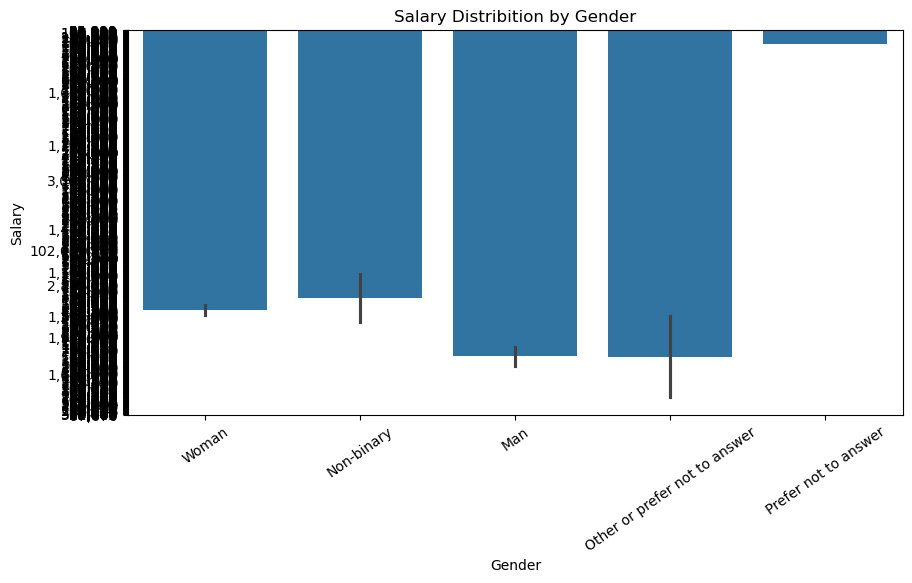

In [28]:
# Comparing gender salary.
plt.figure(figsize=(10, 5))

# Creating a barplot to compare
sns.barplot(data=salary, x='Gender', y='Salary Year')

# Title and labels
plt.title('Salary Distribition by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.xticks(rotation=35)

#Show the chart
plt.show()

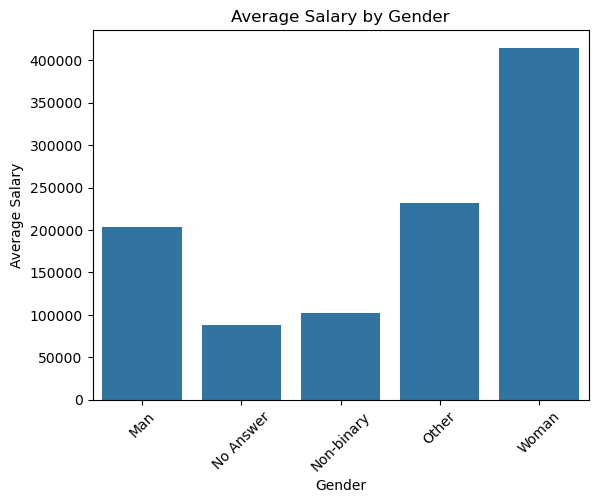

<Figure size 1000x500 with 0 Axes>

In [29]:
# CHange Salary Year to string and remove commas
salary['Salary Year'] = salary['Salary Year'].astype(str).str.replace(',', '', regex=False)

# Convert the Salary Year column to numeric and errors to NaN
salary['Salary Year'] = pd.to_numeric(salary['Salary Year'], errors='coerce')

# Renaming Gender labels for better vizualization
gender_mapping = {"Other or prefer not to answer": "Other", "Prefer not to answer": "No Answer"}
salary['Gender'] = salary['Gender'].replace(gender_mapping)

# Group by Gender and calculate the mean salary
salary = salary.groupby('Gender')['Salary Year'].mean().reset_index()

# Create the bar plot
sns.barplot(data=salary, x='Gender', y='Salary Year')

# Adding title and labels adn adjustments
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.figure(figsize=(10, 5))


# Show plot
plt.show()
